### Classification problem

#### To design a model that uses the current credentials/demographics/experience to predict the probability of an enrollee to look for a new job.

Data Dictionary 
Variable

Description

enrollee_id
-Unique ID for enrollee

city
-City code

city_development_index
-Developement index of the city (scaled)

gender
-Gender

relevent_experience
-Relevent experience

enrolled_university
-Type of University course enrolled if any

education_level
-Education level

major_discipline
-Major discipline

experience
-Total experience in years

company_size
-No of employees in current employer's company

company_type
-Type of current employer

last_new_job
-Difference in years between previous job and current job

training_hours
-training hours completed

target

0 – Not looking for job change, 1 – Looking for a job change

 

Note that the dataset has a number of missing values and must be treated accordingly before fitting any model. You can refer to this article for a primer on how to deal with missing values.

sample_submission.csv


Column Name	Description
enrollee_id

Unique ID for enrollee


target


probability of an enrollee looking for a job change

Evaluation Metric
The evaluation metric for this competition is AUC-ROC score.



## Importing dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')
import os
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:

pd.options.display.max_columns = 100
pd.options.display.max_rows = 200

In [0]:
#path2 = 'D:/Programming/Python/Jupyter Notebook Files/Competitions/HR Analytics/JanataHack/'
path = '/content/drive/My Drive/Colab Notebooks/Datasets/HR Analytics/'
os.chdir(path)


In [0]:
train = pd.read_csv(path+'train_jqd04QH.csv')
test = pd.read_csv(path+'test_KaymcHn.csv')

In [7]:
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0
2,46,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26,0
4,21751,city_100,0.887,NaN,No relevent experience,no_enrollment,Masters,STEM,8,NaN,NaN,2,88,1


In [8]:
test.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,16548,city_33,0.448,NaN,No relevent experience,Full time course,Graduate,STEM,<1,1000-4999,Public Sector,NaN,15
1,12036,city_28,0.939,Male,No relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,94
2,11061,city_103,0.920,Male,No relevent experience,Full time course,Graduate,STEM,3,NaN,NaN,1,17
3,5032,city_104,0.924,Male,No relevent experience,no_enrollment,Phd,STEM,>20,50-99,Pvt Ltd,2,76
4,17599,city_77,0.830,Male,Has relevent experience,no_enrollment,Graduate,STEM,6,<10,Pvt Ltd,2,65


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18359 entries, 0 to 18358
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             18359 non-null  int64  
 1   city                    18359 non-null  object 
 2   city_development_index  18359 non-null  float64
 3   gender                  14261 non-null  object 
 4   relevent_experience     18359 non-null  object 
 5   enrolled_university     18017 non-null  object 
 6   education_level         17902 non-null  object 
 7   major_discipline        15521 non-null  object 
 8   experience              18300 non-null  object 
 9   company_size            13580 non-null  object 
 10  company_type            13320 non-null  object 
 11  last_new_job            17992 non-null  object 
 12  training_hours          18359 non-null  int64  
 13  target                  18359 non-null  int64  
dtypes: float64(1), int64(3), object(10)
me

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15021 entries, 0 to 15020
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             15021 non-null  int64  
 1   city                    15021 non-null  object 
 2   city_development_index  15021 non-null  float64
 3   gender                  11633 non-null  object 
 4   relevent_experience     15021 non-null  object 
 5   enrolled_university     14742 non-null  object 
 6   education_level         14626 non-null  object 
 7   major_discipline        12628 non-null  object 
 8   experience              14977 non-null  object 
 9   company_size            10970 non-null  object 
 10  company_type            10691 non-null  object 
 11  last_new_job            14717 non-null  object 
 12  training_hours          15021 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 1.5+ MB


In [11]:
train.describe()

,enrollee_id,city_development_index,training_hours,target
count,18359.000000,18359.000000,18359.000000,18359.000000
mean,16729.360096,0.847140,65.899014,0.132088
std,9643.749725,0.110189,60.885300,0.338595
min,1.000000,0.448000,1.000000,0.000000
25%,8378.500000,0.796000,23.000000,0.000000
50%,16706.000000,0.910000,47.000000,0.000000
75%,25148.500000,0.920000,89.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


## Missing values
As there are missing values in the dataset, we will find out which features have missing values and the percentage of missing values

In [0]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().mean()
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
                                                            '% of Total Values', ascending=False).round(3)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"     
            "There are " + str(mis_val_table_ren_columns.shape[0]) + " columns that have missing values.")
    return mis_val_table_ren_columns

In [13]:
missing_values_table(train)

Your selected dataframe has 14 columns.
There are 8 columns that have missing values.


,Missing Values,% of Total Values
company_type,5039,27.447
company_size,4779,26.031
gender,4098,22.321
major_discipline,2838,15.458
education_level,457,2.489
last_new_job,367,1.999
enrolled_university,342,1.863
experience,59,0.321


In [14]:
missing_values_table(test)

Your selected dataframe has 13 columns.
There are 8 columns that have missing values.


,Missing Values,% of Total Values
company_type,4330,28.826
company_size,4051,26.969
gender,3388,22.555
major_discipline,2393,15.931
education_level,395,2.630
last_new_job,304,2.024
enrolled_university,279,1.857
experience,44,0.293


## Exploratory data analysis

### Target variable

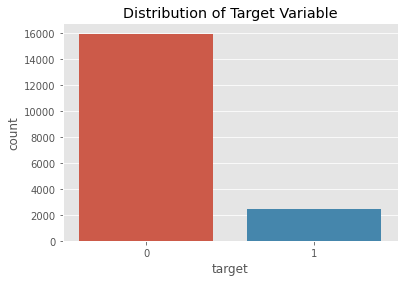

In [15]:
sns.countplot(train['target']);
plt.title("Distribution of Target Variable");

In [16]:
train['target'].value_counts(dropna=False)/len(train)

0    0.867912
1    0.132088
Name: target, dtype: float64

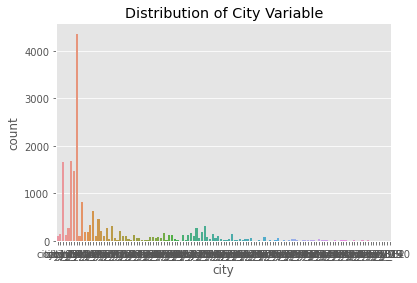

In [17]:
sns.countplot(train['city']);
plt.title("Distribution of City Variable");

Making a better plot

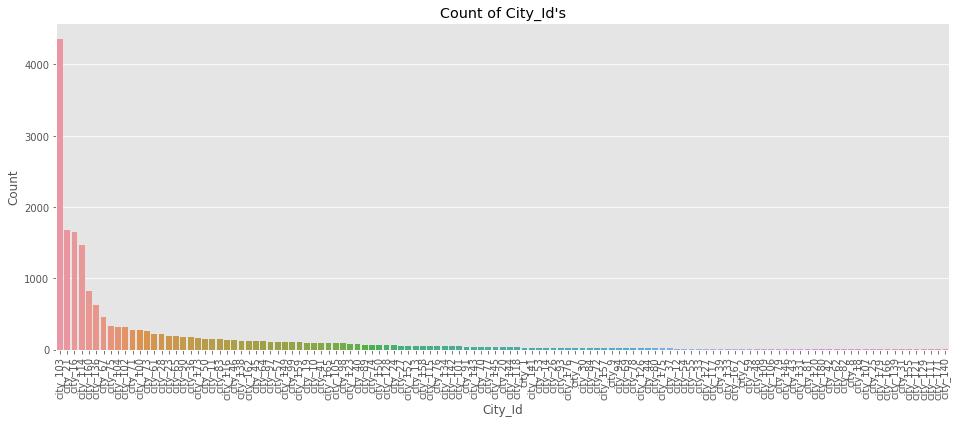

In [18]:
plt.figure(figsize=(16,6));
sns.barplot(x=train['city'].value_counts(dropna=False).index.values,y=train['city'].value_counts(dropna=False).values);
plt.xticks(rotation=90);
plt.xlabel("City_Id");
plt.ylabel("Count");
plt.title("Count of City_Id's");

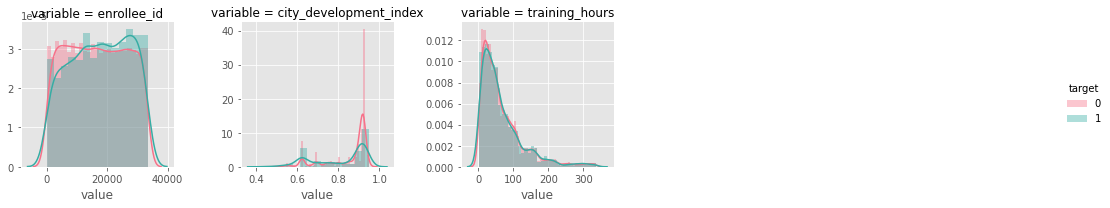

In [19]:
y = 'target'
cols = [ i for i in train.columns if train.dtypes[i] != 'object']
cols.remove(y)

final = pd.melt(train, id_vars=y, value_vars=cols)
gph = sns.FacetGrid(final, col="variable", col_wrap=5, sharex=False, sharey=False, hue=y,palette='husl' )
gph = gph.map(sns.distplot,"value", kde=True).add_legend()

The training hours variable needs furthur analysis as it has values more than 200 hours which does not make sense.

In [20]:
train['training_hours'].describe()

count    18359.000000
mean        65.899014
std         60.885300
min          1.000000
25%         23.000000
50%         47.000000
75%         89.000000
max        336.000000
Name: training_hours, dtype: float64

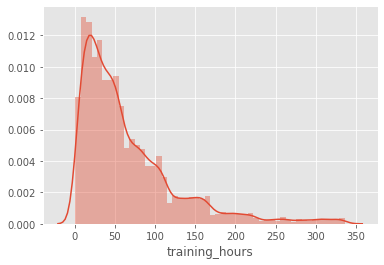

In [21]:
sns.distplot(train['training_hours'])

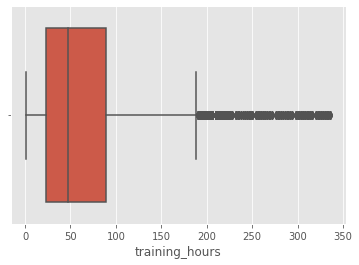

In [22]:
sns.boxplot(train['training_hours'])

We need to scale down the values above ~180 hours as they might distort our classification model

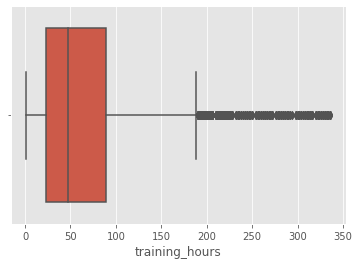

In [23]:
sns.boxplot(test['training_hours'])

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train[['training_hours']] = scaler.fit_transform(train[['training_hours']])
test[['training_hours']] = scaler.fit_transform(test[['training_hours']])

In [26]:
for x in train.columns:
    print(x+':')
    print(train[x].unique())

enrollee_id:
[23798 29166    46 ... 11514  1689  5995]
city:
['city_149' 'city_83' 'city_16' 'city_64' 'city_100' 'city_21' 'city_114'
 'city_103' 'city_97' 'city_160' 'city_65' 'city_90' 'city_75' 'city_136'
 'city_159' 'city_67' 'city_28' 'city_10' 'city_73' 'city_76' 'city_104'
 'city_27' 'city_30' 'city_61' 'city_99' 'city_41' 'city_142' 'city_9'
 'city_116' 'city_128' 'city_74' 'city_69' 'city_1' 'city_176' 'city_40'
 'city_123' 'city_152' 'city_165' 'city_89' 'city_36' 'city_44' 'city_46'
 'city_45' 'city_134' 'city_93' 'city_180' 'city_162' 'city_84' 'city_138'
 'city_173' 'city_19' 'city_71' 'city_158' 'city_23' 'city_102' 'city_105'
 'city_91' 'city_11' 'city_13' 'city_57' 'city_20' 'city_14' 'city_37'
 'city_115' 'city_50' 'city_167' 'city_12' 'city_143' 'city_126' 'city_77'
 'city_101' 'city_150' 'city_179' 'city_107' 'city_175' 'city_146'
 'city_98' 'city_166' 'city_118' 'city_129' 'city_127' 'city_24' 'city_81'
 'city_26' 'city_139' 'city_94' 'city_70' 'city_145' 'city_157

## Preprocessing

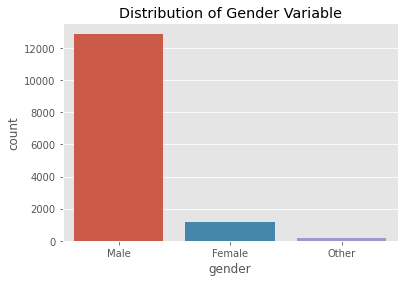

In [27]:
sns.countplot(train['gender']);
plt.title("Distribution of Gender Variable");

In [28]:
train['gender'].value_counts(dropna=False)/len(train)

Male      0.701781
NaN       0.223215
Female    0.064709
Other     0.010295
Name: gender, dtype: float64

In [0]:
train['gender'].fillna('Female',inplace=True)
test['gender'].fillna('Female',inplace=True)

gender_dict = {'Other':0,'Female':1,'Male':2} 
#Giving higher weightage to Males as they are in highest proportion
train['gender'] = train['gender'].apply(lambda x: gender_dict[x])
test['gender'] = test['gender'].apply(lambda x: gender_dict[x])

In [30]:
train['enrolled_university'].value_counts(dropna=False)/len(train)

no_enrollment       0.743995
Full time course    0.173593
Part time course    0.063783
NaN                 0.018628
Name: enrolled_university, dtype: float64

In [0]:
train['enrolled_university'].fillna('Missing',inplace=True)
test['enrolled_university'].fillna('Missing',inplace=True)

enrolled_university_dict = {'Missing':0,'no_enrollment':1,'Part time course':2, 'Full time course':3} 
train['enrolled_university'] = train['enrolled_university'].apply(lambda x: enrolled_university_dict[x])
test['enrolled_university'] = test['enrolled_university'].apply(lambda x: enrolled_university_dict[x])

In [32]:
train['education_level'].value_counts(dropna=False)/len(train)

Graduate          0.586579
Masters           0.235252
High School       0.110681
Phd               0.025001
NaN               0.024892
Primary School    0.017594
Name: education_level, dtype: float64

In [0]:
train['education_level'].fillna('Missing',inplace=True)
test['education_level'].fillna('Missing',inplace=True)

education_level_dict = {'Missing':0,'Primary School':1,'High School':2, 'Graduate':3, 'Masters':4, 'Phd':5} 
train['education_level'] = train['education_level'].apply(lambda x: education_level_dict[x])
test['education_level'] = test['education_level'].apply(lambda x: education_level_dict[x])

In [34]:
train['major_discipline'].value_counts(dropna=False)/len(train)

STEM               0.748298
NaN                0.154584
Humanities         0.037475
Other              0.018683
Business Degree    0.016722
Arts               0.013018
No Major           0.011221
Name: major_discipline, dtype: float64

In [0]:
train['major_discipline'].fillna('Missing',inplace=True)
test['major_discipline'].fillna('Missing',inplace=True)

education_level_dict = {'Missing':0,'No Major':1,'Other':2, 'Humanities':3, 'Arts':4, 'Business Degree':5, 'STEM':6} 
train['major_discipline'] = train['major_discipline'].apply(lambda x: education_level_dict[x])
test['major_discipline'] = test['major_discipline'].apply(lambda x: education_level_dict[x])

In [36]:
train['company_size'].value_counts(dropna=False)/len(train)

NaN          0.260308
50-99        0.169944
100-500      0.146958
10000+       0.111335
10/49        0.079852
1000-4999    0.076202
<10          0.074078
500-999      0.049131
5000-9999    0.032191
Name: company_size, dtype: float64

In [0]:
train['company_size'].replace({"10/49":"10-49"},inplace=True)

In [38]:
test['company_size'].value_counts(dropna=False)/len(test)

NaN          0.269689
50-99        0.171560
100-500      0.142933
10000+       0.107982
10/49        0.079755
1000-4999    0.074163
<10          0.073497
500-999      0.049065
5000-9999    0.031356
Name: company_size, dtype: float64

In [39]:
train['company_size'].value_counts(dropna=False)/len(train)

NaN          0.260308
50-99        0.169944
100-500      0.146958
10000+       0.111335
10-49        0.079852
1000-4999    0.076202
<10          0.074078
500-999      0.049131
5000-9999    0.032191
Name: company_size, dtype: float64

In [0]:
def company_size_binning(x):
    if x=="<10":
        return "Very Small"
    elif x=="10-49":
        return "Small"
    elif x=="50-99":
        return "Small"
    elif x=="100-500":
        return "Small"
    elif x=="500-999":
        return "Medium"
    elif x=="1000-4999":
        return "Medium"
    elif x=="5000-9999":
        return "Large"
    elif x=="10000+":
        return "Large"
    else:
        return "Missing"

In [0]:
train['company_size'] = train['company_size'].apply(company_size_binning)
test['company_size'] = test['company_size'].apply(company_size_binning)

In [42]:
train['company_size'].value_counts(dropna=False)/len(train)

Small         0.396754
Missing       0.260308
Large         0.143526
Medium        0.125334
Very Small    0.074078
Name: company_size, dtype: float64

In [43]:
train['company_type'].value_counts(dropna=False)/len(train)

Pvt Ltd                0.547470
NaN                    0.274470
Funded Startup         0.056539
Public Sector          0.054251
Early Stage Startup    0.031701
NGO                    0.029087
Other                  0.006482
Name: company_type, dtype: float64

In [0]:
train['company_type'].fillna('Missing',inplace=True)
test['company_type'].fillna('Missing',inplace=True)

company_type_dict = {'Missing':0,'Other':1,'Public Sector':2, 'Pvt Ltd':3, 'Funded Startup':4, 'Early Stage Startup':5, 'NGO':6} 
train['company_type'] = train['company_type'].apply(lambda x: company_type_dict[x])
test['company_type'] = test['company_type'].apply(lambda x: company_type_dict[x])

In [45]:
train['last_new_job'].value_counts(dropna=False)/len(train)

1        0.412168
>4       0.181873
2        0.154420
never    0.119070
4        0.056539
3        0.055940
NaN      0.019990
Name: last_new_job, dtype: float64

In [0]:
def last_new_job_binning(x):
    if x=="never":
        return 0
    elif x=="1":
        return 1
    elif x=="2":
        return 2
    elif x=="3":
        return 3
    elif x=="4":
        return 4
    elif x==">4":
        return 5
    else:
        return "Missing"

In [0]:
train['last_new_job'] = train['last_new_job'].apply(last_new_job_binning)
test['last_new_job'] = test['last_new_job'].apply(last_new_job_binning)

In [48]:
(train['experience'].value_counts(dropna=False)/len(train)).sort_values(ascending=False)

>20    0.187211
5      0.071300
4      0.068086
3      0.063130
6      0.061278
2      0.054033
9      0.053325
10     0.052672
7      0.051746
8      0.041124
15     0.037856
11     0.036331
14     0.032790
16     0.029904
12     0.027071
1      0.024620
<1     0.022659
13     0.022441
17     0.018901
19     0.016777
18     0.015578
20     0.007953
NaN    0.003214
Name: experience, dtype: float64

In [0]:
train['experience'] = train['experience'].replace({"<1":"0",">20":"21"})
train['experience'].fillna("0",inplace=True)
test['experience'] = test['experience'].replace({"<1":"0",">20":"21"})
test['experience'].fillna("0",inplace=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text major ticklabel objects>)

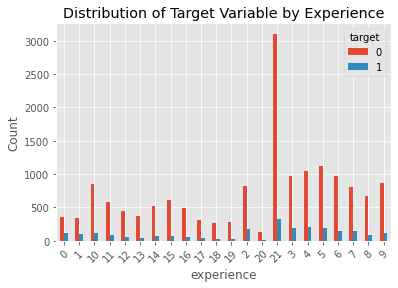

In [50]:
train.groupby('experience')['target'].value_counts().unstack().plot(kind='bar',
                                                                    title="Distribution of Target Variable by Experience")
plt.xlabel("experience")
plt.ylabel("Count")
plt.xticks(rotation=45)

- Candidates with higher experince are less likely to switch. But due to their numbers being the highest, there are more candidates who would switch and are having >20 yrs experience.
- Candidates with 11-20 years experience are less in number and can be grouped into one category.

In [0]:
def experience_binning(x):
    if (x==21):
        return 4
    elif (x>2 and x<=10):
        return 3
    elif (x>11 and x<=20):
        return 2    
    elif (x>0 and x<=2):
        return 1
    else:
        return 0

In [54]:
train['experience'] = train['experience'].astype(int)
train['experience'] = train['experience'].apply(experience_binning)

test['experience'] = test['experience'].astype(int)
test['experience'] = test['experience'].apply(experience_binning)

print(train['experience'].value_counts(dropna=False)/len(train))

3    0.462661
2    0.209271
4    0.187211
1    0.078654
0    0.062204
Name: experience, dtype: float64


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

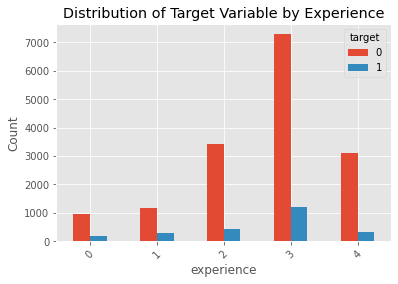

In [55]:
train.groupby('experience')['target'].value_counts().unstack().plot(kind='bar',
                                                                    title="Distribution of Target Variable by Experience")
plt.xlabel("experience")
plt.ylabel("Count")
plt.xticks(rotation=45)

### Correlation plot

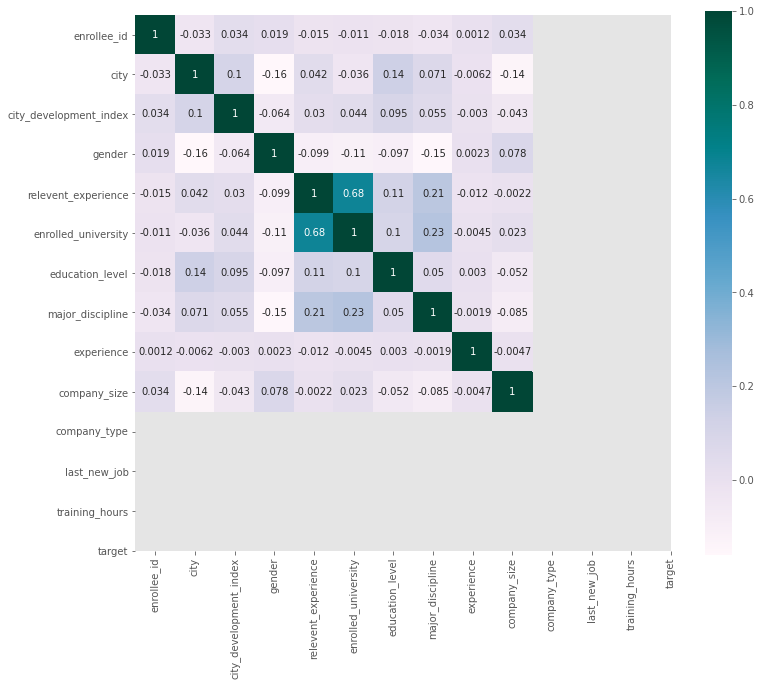

In [56]:
corr_matrix = train.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix,
                square=True,cmap='PuBuGn',
            xticklabels=train.columns,
            yticklabels=train.columns, annot=True)

## Model Building

We build a model on inital dataset with cleaning up of missing values.

In [57]:
pip install pycaret

     |████████████████████████████████| 194kB 2.8MB/s 
     |████████████████████████████████| 1.6MB 11.7MB/s 
     |████████████████████████████████| 3.1MB 17.3MB/s 
     |████████████████████████████████| 81kB 10.3MB/s 
     |████████████████████████████████| 63.9MB 66kB/s 
     |████████████████████████████████| 61kB 7.8MB/s 
     |████████████████████████████████| 266kB 51.0MB/s 
     |████████████████████████████████| 102kB 12.8MB/s 
     |████████████████████████████████| 389kB 36.7MB/s 
     |████████████████████████████████| 7.0MB 49.7MB/s 
     |████████████████████████████████| 133kB 54.9MB/s 
     |████████████████████████████████| 1.2MB 38.6MB/s 
     |████████████████████████████████| 552kB 38.5MB/s 
     |████████████████████████████████| 6.2MB 43.5MB/s 
     |████████████████████████████████| 51kB 7.0MB/s 
     |████████████████████████████████| 71kB 8.9MB/s 
     |████████████████████████████████| 235kB 53.9MB/s 
     |████████████████████████████████| 2.1MB 42.6MB/s 
 

In [58]:
from pycaret.classification import *
#intialize the setup
emp_clf1 = setup(data = train, target = 'target', high_cardinality_features = ['city'])

 
Setup Succesfully Completed!


,Description,Value
0,session_id,3209
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(18359, 14)"
4,Missing Values,False
5,Numeric Features,3
6,Categorical Features,10
7,Ordinal Features,False
8,High Cardinality Features,True
9,High Cardinality Method,frequency


In [59]:
compare_models(fold = 5,  round = 3,  sort = 'Accuracy', turbo = True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Logistic Regression,0.868000,0.606000,0.000000,0.000000,0.000000,0.000000
1,SVM - Linear Kernel,0.868000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Ridge Classifier,0.868000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Extreme Gradient Boosting,0.868000,0.659000,0.001000,0.167000,0.002000,0.001000
4,Ada Boost Classifier,0.867000,0.652000,0.005000,0.250000,0.010000,0.005000
5,Gradient Boosting Classifier,0.867000,0.662000,0.005000,0.305000,0.009000,0.005000
6,Linear Discriminant Analysis,0.867000,0.655000,0.010000,0.449000,0.019000,0.012000
7,Light Gradient Boosting Machine,0.865000,0.642000,0.017000,0.326000,0.032000,0.018000
8,CatBoost Classifier,0.865000,0.644000,0.009000,0.199000,0.018000,0.008000
9,Random Forest Classifier,0.858000,0.583000,0.035000,0.236000,0.060000,0.027000


We will use Gradient boosting classifier as that gives the highest AUC score.

### Feature Engineering
-- Groupby

In [0]:
target_mean_grouped_by_gender = np.round(train.groupby('gender')['target'].mean(),2).to_dict()
train['target_mean_grouped_by_gender'] = train['gender'].map(target_mean_grouped_by_gender)

target_mean_grouped_by_relevent_exp = np.round(train.groupby('relevent_experience')['target'].mean(),2).to_dict()
train['target_mean_grouped_by_relevent_exp'] = train['relevent_experience'].map(target_mean_grouped_by_relevent_exp)

target_mean_grouped_by_enrolled_university = np.round(train.groupby('enrolled_university')['target'].mean(),2).to_dict()
train['target_mean_grouped_by_enrolled_university'] = train['enrolled_university'].map(target_mean_grouped_by_enrolled_university)

target_mean_grouped_by_education_level = np.round(train.groupby('education_level')['target'].mean(),2).to_dict()
train['target_mean_grouped_by_education_level'] = train['education_level'].map(target_mean_grouped_by_education_level)

target_mean_grouped_by_major_discipline = np.round(train.groupby('major_discipline')['target'].mean(),2).to_dict()
train['target_mean_grouped_by_major_discipline'] = train['major_discipline'].map(target_mean_grouped_by_major_discipline)

target_mean_grouped_by_experience = np.round(train.groupby('experience')['target'].mean(),2).to_dict()
train['target_mean_grouped_by_experience'] = train['experience'].map(target_mean_grouped_by_experience)

target_mean_grouped_by_company_size = np.round(train.groupby('company_size')['target'].mean(),2).to_dict()
train['target_mean_grouped_by_company_size'] = train['company_size'].map(target_mean_grouped_by_company_size)

target_mean_grouped_by_company_type = np.round(train.groupby('company_type')['target'].mean(),2).to_dict()
train['target_mean_grouped_by_company_type'] = train['company_type'].map(target_mean_grouped_by_company_type)


In [0]:

test['target_mean_grouped_by_gender'] = test['gender'].map(target_mean_grouped_by_gender)
test['target_mean_grouped_by_relevent_exp'] = test['relevent_experience'].map(target_mean_grouped_by_relevent_exp)
test['target_mean_grouped_by_enrolled_university'] = test['enrolled_university'].map(target_mean_grouped_by_enrolled_university)
test['target_mean_grouped_by_education_level'] = test['education_level'].map(target_mean_grouped_by_education_level)
test['target_mean_grouped_by_major_discipline'] = test['major_discipline'].map(target_mean_grouped_by_major_discipline)
test['target_mean_grouped_by_experience'] = test['experience'].map(target_mean_grouped_by_experience)
test['target_mean_grouped_by_company_size'] = test['company_size'].map(target_mean_grouped_by_company_size)
test['target_mean_grouped_by_company_type'] = test['company_type'].map(target_mean_grouped_by_company_type)

In [62]:
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,target_mean_grouped_by_gender,target_mean_grouped_by_relevent_exp,target_mean_grouped_by_enrolled_university,target_mean_grouped_by_education_level,target_mean_grouped_by_major_discipline,target_mean_grouped_by_experience,target_mean_grouped_by_company_size,target_mean_grouped_by_company_type
0,23798,city_149,0.689,2,Has relevent experience,1,3,6,3,Small,3,1,0.313433,0,0.12,0.12,0.12,0.14,0.14,0.14,0.11,0.11
1,29166,city_83,0.923,2,Has relevent experience,1,3,6,2,Very Small,4,1,0.202985,0,0.12,0.12,0.12,0.14,0.14,0.11,0.11,0.09
2,46,city_16,0.910,1,Has relevent experience,1,3,6,3,Small,2,2,0.008955,0,0.15,0.12,0.12,0.14,0.14,0.14,0.11,0.15
3,18527,city_64,0.666,2,Has relevent experience,1,3,6,2,Small,3,1,0.074627,0,0.12,0.12,0.12,0.14,0.14,0.11,0.11,0.11
4,21751,city_100,0.887,1,No relevent experience,1,4,6,3,Missing,0,2,0.259701,1,0.15,0.17,0.12,0.12,0.14,0.14,0.19,0.18


In [63]:
test.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target_mean_grouped_by_gender,target_mean_grouped_by_relevent_exp,target_mean_grouped_by_enrolled_university,target_mean_grouped_by_education_level,target_mean_grouped_by_major_discipline,target_mean_grouped_by_experience,target_mean_grouped_by_company_size,target_mean_grouped_by_company_type
0,16548,city_33,0.448,1,No relevent experience,3,3,6,0,Medium,2,Missing,0.041791,0.15,0.17,0.19,0.14,0.14,0.17,0.11,0.15
1,12036,city_28,0.939,2,No relevent experience,1,3,6,4,Small,3,1,0.277612,0.12,0.17,0.12,0.14,0.14,0.10,0.11,0.11
2,11061,city_103,0.920,2,No relevent experience,3,3,6,3,Missing,0,1,0.047761,0.12,0.17,0.19,0.14,0.14,0.14,0.19,0.18
3,5032,city_104,0.924,2,No relevent experience,1,5,6,4,Small,3,2,0.223881,0.12,0.17,0.12,0.12,0.14,0.10,0.11,0.11
4,17599,city_77,0.830,2,Has relevent experience,1,3,6,3,Very Small,3,2,0.191045,0.12,0.12,0.12,0.14,0.14,0.14,0.11,0.11


## Making another model

In [64]:
emp_clf2 = setup(data = train, target = 'target', high_cardinality_features = ['city'])
compare_models(fold = 5, round = 3,  sort = 'Accuracy', turbo = True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Logistic Regression,0.868000,0.588000,0.000000,0.000000,0.000000,0.000000
1,Ridge Classifier,0.868000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Extreme Gradient Boosting,0.868000,0.661000,0.001000,0.040000,0.001000,0.000000
3,Ada Boost Classifier,0.867000,0.645000,0.003000,0.218000,0.006000,0.002000
4,Gradient Boosting Classifier,0.867000,0.658000,0.003000,0.409000,0.006000,0.002000
5,CatBoost Classifier,0.867000,0.644000,0.019000,0.420000,0.036000,0.025000
6,Linear Discriminant Analysis,0.866000,0.651000,0.005000,0.295000,0.010000,0.005000
7,Light Gradient Boosting Machine,0.865000,0.636000,0.018000,0.312000,0.034000,0.021000
8,SVM - Linear Kernel,0.863000,0.000000,0.006000,0.049000,0.010000,-0.002000
9,Random Forest Classifier,0.858000,0.590000,0.035000,0.237000,0.061000,0.028000


XG boost performs beeter than Gradeint boosting after feature engineering.

## Hyperparameter tuning